<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/AULA_18_Avalia%C3%A7%C3%A3o_de_Classificadores_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 18 - Avaliação de Classificadores - Prática

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_digits

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# Conjunto de dados

**Classificação de dígitos manuscritos.**

Methods of Combining Multiple Classifiers and Their Applications to Handwritten Digit Recognition. MSc Thesis, Institute of Graduate Studies in Science and Engineering, Bogazici University. C. Kaynak. 1995.



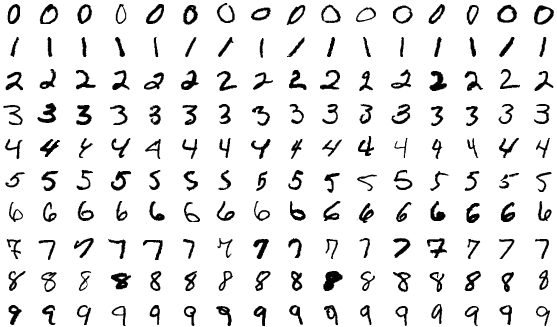

## Carregando a base de dados

In [ ]:
digits = load_digits()

Visualizando os dígitos: imagens 8x8 (pixels)

<Figure size 640x480 with 0 Axes>

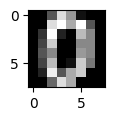

In [ ]:
plt.gray()
plt.figure(figsize=(1,1))
plt.imshow(digits.images[0])

<Figure size 640x480 with 0 Axes>

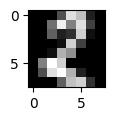

In [ ]:
plt.gray()
plt.figure(figsize=(1,1))
plt.imshow(digits.images[50])

## Carregando os dados no formato atributo-valor e respectivo label.

In [ ]:
df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
df['Label'] = digits.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,Label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


## Preparando os dados para nosso experimento

Vamos dividir os dados treino (70%) e teste (30%)

In [ ]:
X=df.drop('Label', axis=1) # X contém todos os atributos menos o label
y=df['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        45
           1       0.84      0.94      0.89        52
           2       0.91      0.81      0.86        53
           3       0.80      0.83      0.82        54
           4       0.83      0.90      0.86        48
           5       0.82      0.89      0.86        57
           6       0.92      0.92      0.92        60
           7       0.94      0.89      0.91        53
           8       0.83      0.74      0.78        61
           9       0.88      0.86      0.87        57

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.87      0.87      0.87       540



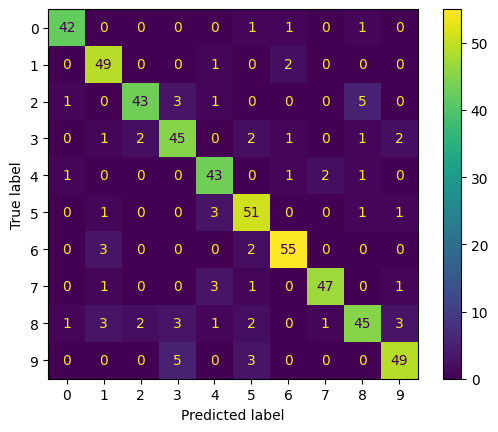

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

## K-Fold Cross-Validation

Vamos utilizar k=5

Primeiro, testando o método cross_val_score()

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

scores = cross_val_score(clf, X, y, cv=skfold, scoring='accuracy')
print(scores)
print("Média (Accuracy):",scores.mean())
print("Desvio Padrão (Accuracy):",scores.std())

[0.89166667 0.85       0.84401114 0.86908078 0.86629526]
Média (Accuracy): 0.8642107706592388
Desvio Padrão (Accuracy): 0.01668447979003853


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(clf, X, y, cv=skfold, scoring='f1_macro')

print(scores)
print("Média (f1_macro):",scores.mean())
print("Desvio Padrão (f1_macro):",scores.std())

[0.890424   0.84878674 0.84027597 0.86712255 0.86572353]
Média (f1_macro): 0.8624665557438419
Desvio Padrão (f1_macro): 0.01728273280459495


O make_pipeline() é útil para avaliar um classificador já considerando alguma etapa de pré-processamento.

In [ ]:
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='entropy',random_state=0))

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_val_score(clf, X, y, cv=skfold, scoring='accuracy')

print(scores)
print("Média (Accuracy):",scores.mean())
print("Desvio Padrão (Accuracy):",scores.std())

[0.88888889 0.84722222 0.84401114 0.86350975 0.86629526]
Média (Accuracy): 0.8619854534199938
Desvio Padrão (Accuracy): 0.016035720469018105


Se desejarmos calcular diferentes métricas, podemos usar o método cross_validate()

In [ ]:
metrics = ['accuracy', 'f1_macro']
clf = make_pipeline(StandardScaler(), DecisionTreeClassifier(criterion='entropy',random_state=0))

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
scores = cross_validate(clf, X, y, cv=skfold, scoring=metrics)

df_scores = pd.DataFrame(scores)
df_scores

,fit_time,score_time,test_accuracy,test_f1_macro
0,0.073164,0.009279,0.888889,0.887635
1,0.064653,0.010991,0.847222,0.845834
2,0.055666,0.011673,0.844011,0.840276
3,0.063376,0.008993,0.863510,0.861526
4,0.129957,0.035020,0.866295,0.865726


In [ ]:
df_scores.describe()

,fit_time,score_time,test_accuracy,test_f1_macro
count,5.000000,5.000000,5.000000,5.000000
mean,0.077363,0.015191,0.861985,0.860199
std,0.030049,0.011142,0.017928,0.018630
min,0.055666,0.008993,0.844011,0.840276
25%,0.063376,0.009279,0.847222,0.845834
50%,0.064653,0.010991,0.863510,0.861526
75%,0.073164,0.011673,0.866295,0.865726
max,0.129957,0.035020,0.888889,0.887635


## Analisando parâmetros de um classificador (seleção de modelos)

Método GridSearchCV faz uma busca exaustiva a partir dos parâmetros do seu interesse e uma medida de avaliação.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

parameters = {
    'criterion':('entropy','gini'),
    'max_depth':[3, 5, 10, None]
    }

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, cv=skfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ('entropy', 'gini'),
                         'max_depth': [3, 5, 10, None]},
             scoring='accuracy')

Analisando os resultados obtidos pelo GridSearchCV

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.029427,0.009112,0.007532,0.004587,entropy,3,"{'criterion': 'entropy', 'max_depth': 3}",0.527778,0.575397,0.517928,0.553785,0.553785,0.545735,0.020519,7
1,0.046107,0.012588,0.025342,0.022038,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.781746,0.777778,0.800797,0.776892,0.772908,0.782024,0.009797,5
2,0.076064,0.021488,0.014127,0.003675,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.849206,0.833333,0.844622,0.828685,0.864542,0.844078,0.012631,2
3,0.050880,0.015805,0.009382,0.004559,entropy,None,"{'criterion': 'entropy', 'max_depth': None}",0.849206,0.829365,0.844622,0.828685,0.876494,0.845674,0.017424,1
4,0.019595,0.009595,0.006209,0.002197,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.456349,0.404762,0.470120,0.454183,0.466135,0.450310,0.023533,8
5,0.032160,0.011081,0.007204,0.003374,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.757937,0.654762,0.745020,0.709163,0.709163,0.715209,0.035892,6
6,0.064764,0.022746,0.008692,0.004366,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.849206,0.825397,0.856574,0.836653,0.844622,0.842490,0.010717,4
7,0.051462,0.024043,0.009852,0.007282,gini,None,"{'criterion': 'gini', 'max_depth': None}",0.841270,0.825397,0.856574,0.836653,0.852590,0.842497,0.011208,3


Podemos verificar diretamente quais foram os melhores parâmetros e o melhor score associado

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': None}
0.8456744450768354


Também podemos acessar o melhor classificador diretamente pelo GridSearchCV

In [ ]:
clf = grid_search.best_estimator_
clf.predict(X_test)

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 3, 9, 4, 3, 1, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 1, 2, 1, 9, 6, 7, 9, 0, 0, 4, 1, 5, 3, 6, 2, 3, 4, 1, 9,
       2, 6, 9, 1, 8, 3, 5, 1, 2, 8, 2, 8, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 4, 7, 4, 8, 5, 0, 5, 4, 2, 5, 5, 0, 5, 1, 4, 1,
       1, 4, 8, 9, 7, 9, 8, 2, 1, 5, 2, 5, 3, 4, 1, 7, 0, 6, 1, 5, 5, 3,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 1, 5, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 8, 7, 6, 7, 6, 5, 6, 0, 2, 8, 9, 5, 6, 1, 0, 4, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 5, 3, 3, 0, 7, 7, 8, 7, 8, 0, 7, 2, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 3, 1, 4, 8, 1, 6, 9, 9,
       2, 4, 9, 3, 4, 6, 8, 3, 3, 1, 6, 9, 3, 6, 3, 2, 2, 0, 7, 6, 1, 1,
       3, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 1,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 3, 6, 8, 3, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

Por fim, vale destacar o GridSearchCV pode ser utilizado dentro o make_pipeline() e atua como um classificador. Assim, podemos unir a análise dos parâmetros junto com uma estratégia de pré-processamento.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
parameters = {
    'criterion':('entropy','gini'),
    'max_depth':[3, 5, 10, None]
    }

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

clf = make_pipeline(StandardScaler(),
                    GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, cv=skfold, scoring='accuracy',refit=True))

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        45
           1       0.83      0.94      0.88        52
           2       0.91      0.79      0.85        53
           3       0.80      0.83      0.82        54
           4       0.83      0.90      0.86        48
           5       0.82      0.88      0.85        57
           6       0.93      0.92      0.92        60
           7       0.94      0.89      0.91        53
           8       0.83      0.74      0.78        61
           9       0.84      0.86      0.85        57

    accuracy                           0.87       540
   macro avg       0.87      0.87      0.87       540
weighted avg       0.87      0.87      0.87       540

